In [1]:
# IMport important 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Read in the data
df = pd.read_csv("/home/yushi/code/churn_broadcasting/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Gather info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
# We need to change the TotalCharges to float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [16]:
# Gather summary statistics about the data
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


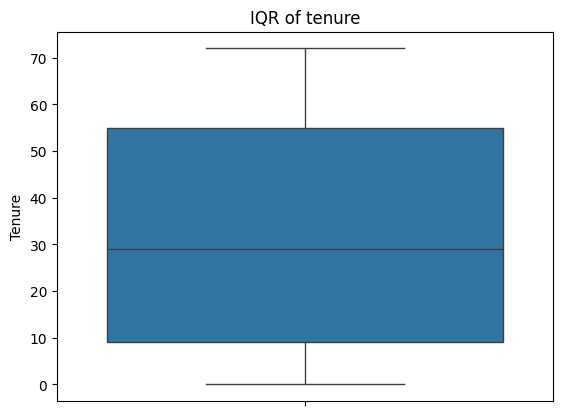

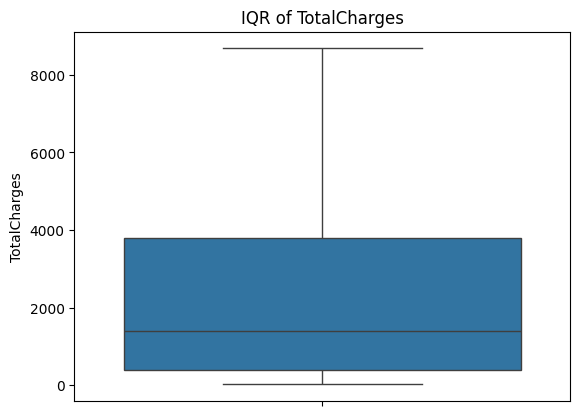

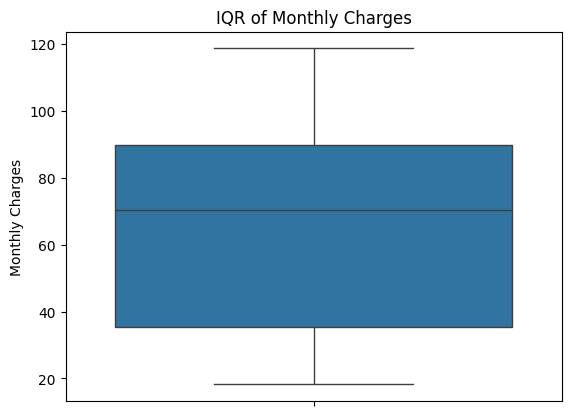

In [17]:
# We need to visualize the IQR of the MonthlyCharges, TotalCharges and tenure columns
sns.boxplot(data=df, y="tenure")
plt.title("IQR of tenure")
plt.ylabel("Tenure")
plt.savefig("../figures/tenure_box_plot.png")

plt.show()


sns.boxplot(data=df, y="TotalCharges")
plt.title("IQR of TotalCharges")
plt.ylabel("TotalCharges")
plt.savefig("../figures/total_charges_box_plot.png")

plt.show()

sns.boxplot(data=df, y="MonthlyCharges")
plt.title("IQR of Monthly Charges")
plt.ylabel("Monthly Charges")
plt.savefig("../figures/monthly_charges_box_plot.png")

plt.show()

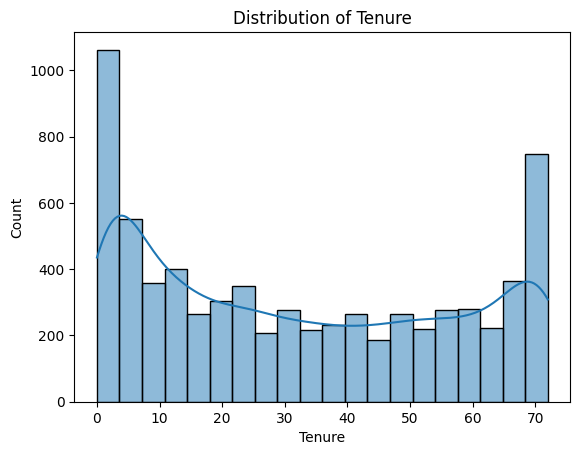

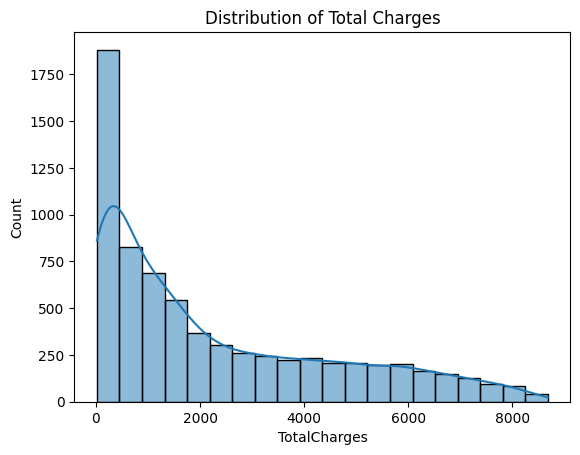

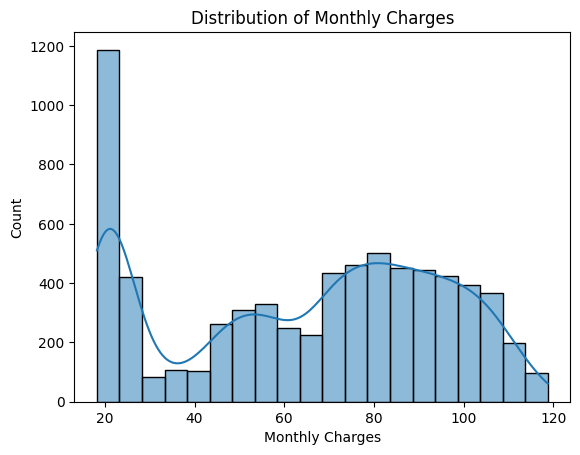

In [18]:
# Plot the distribution of the MonthlyCharges, TotalCharges and tenure columns and compare them to the normal distribution
sns.histplot(df["tenure"], bins=20, kde=True)
plt.xlabel("Tenure")
plt.title("Distribution of Tenure")
plt.savefig("../figures/tenure_histogram.png")

plt.show()

sns.histplot(df["TotalCharges"], bins=20, kde=True)
plt.xlabel("TotalCharges")
plt.title("Distribution of Total Charges")
plt.savefig("../figures/total_charges_histogram.png")

plt.show()

sns.histplot(df['MonthlyCharges'], bins=20, kde=True)
plt.xlabel("Monthly Charges")
plt.title("Distribution of Monthly Charges")
plt.savefig("../figures/monthly_charges_histogram.png")

plt.show()

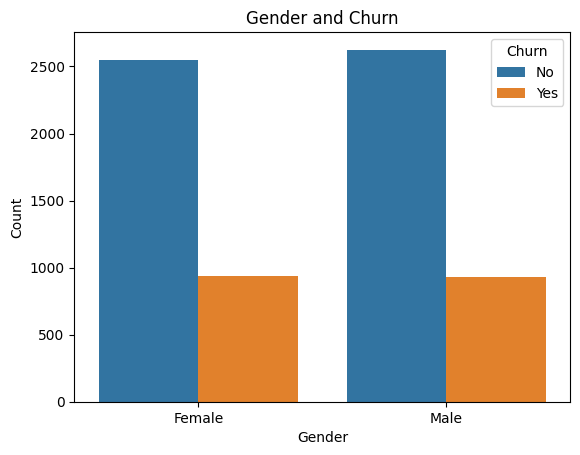

In [ ]:
# Now that we know that that data is not normal and the TotalCharges is left-skeweed
# Now we need to plot the relation between the gender and churn
sns.countplot(data=df, x="gender", hue="Churn")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender and Churn")
plt.savefig("../figures/gender_churn.png")
plt.show()

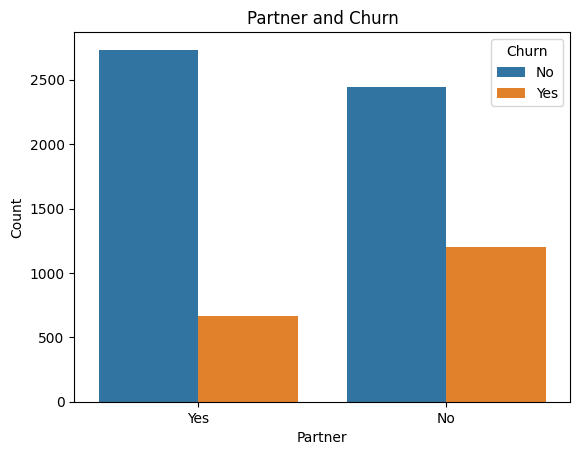

In [12]:
# Now we find out that there is very low corelation between the gender and churn
# Now we find out is there a corelation between partner and churn
sns.countplot(data=df, x="Partner", hue="Churn")
plt.xlabel("Partner")
plt.ylabel("Count")
plt.title("Partner and Churn")
plt.savefig("../figures/partner_churn.png")
plt.show()

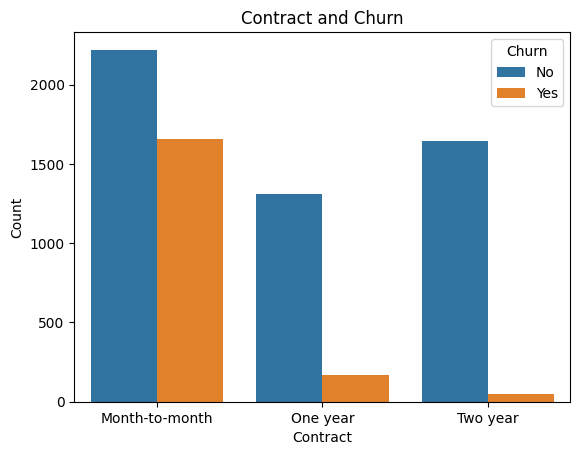

In [13]:
# So there is some relationship between the if the customer has a partner or not and the churn, so if you have don't have a partner you are more likely to churn
# Now we need to check if the Contract type is related to the churn
sns.countplot(data=df, x="Contract", hue="Churn")
plt.xlabel("Contract")
plt.ylabel("Count")
plt.title("Contract and Churn")
plt.savefig("../figures/contract_churn.png")
plt.show()

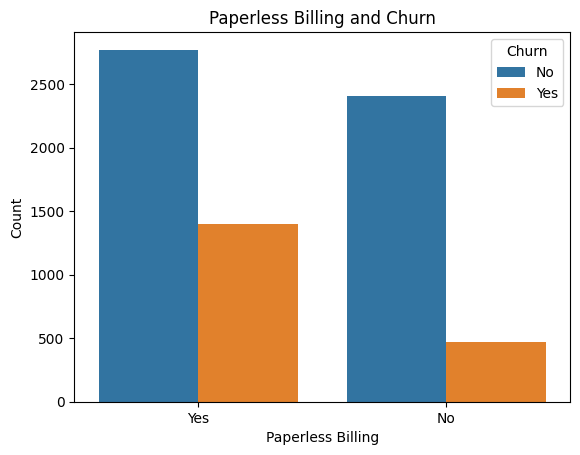

In [14]:
# So we found out that it's related pretty much.
# let's see the relation between the PaperlessBilling and churn.
sns.countplot(data=df, x="PaperlessBilling", hue="Churn")
plt.xlabel("Paperless Billing")
plt.ylabel("Count")
plt.title("Paperless Billing and Churn")
plt.savefig("../figures/billing_churn.png")
plt.show()

In [ ]:
# So paperless billings leads to more churn.